In [8]:
import gzip, pickle
from pathlib import Path

In [2]:
DATA_DOWNLOAD_PATH = 'https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
DATA_FOLDER = Path('data')
DATA_FOLDER.mkdir(exist_ok=True)
DATA_FILE  = DATA_FOLDER/'mnist.pkl.gz'


In [4]:
from urllib.request import urlretrieve

In [6]:
if not DATA_FILE.exists():
    urlretrieve(DATA_DOWNLOAD_PATH, DATA_FILE)

In [7]:
!ls -l data

total 34560
-rw-r--r--@ 1 arun  staff  17051982 Apr 24 09:43 mnist.pkl.gz


In [16]:
with gzip.open(DATA_FILE, 'rb') as f:
    data = pickle.load(f, encoding='latin')

In [17]:
((x_train, y_train), (x_val, y_val), _) = data

In [18]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((50000, 784), (50000,), (10000, 784), (10000,))

In [19]:
import torch

In [20]:
(x_train, y_train, x_val, y_val) = map(lambda x: torch.tensor(x), (x_train, y_train, x_val, y_val))

In [21]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

(torch.Size([50000, 784]),
 torch.Size([50000]),
 torch.Size([10000, 784]),
 torch.Size([10000]))

In [92]:
def chunks(x, sz):
    for i in range(0, len(x), sz):
        yield x[i:i+sz]

In [93]:
chnkls = chunks(x_val, 5)

In [94]:
chnkls

<generator object chunks at 0x17e0305e0>

In [95]:
next(chnkls).shape

torch.Size([5, 784])

In [96]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [97]:
mpl.rcParams['image.cmap'] = 'gray'

In [107]:
ls = x_train[0]

In [108]:
ls.shape

torch.Size([784])

In [116]:
ls1 = list(chunks(list(ls), 28))

In [114]:
ls1[2]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

In [117]:
ls1[2]

[tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.),
 tensor(0.)]

In [110]:
len(ls1[0])

28

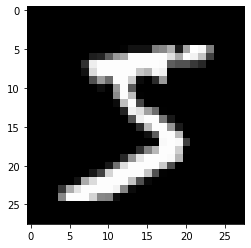

In [118]:
plt.imshow(ls1)

In [168]:
t = [1, 2, 3, 4, 5]

In [169]:
tt = iter(t)

In [170]:
tt

In [173]:
k = tt.__iter__()

In [174]:
k

In [175]:
k == tt

True

In [158]:
t =  {i:'_' for i in range(5)}
t

{0: '_', 1: '_', 2: '_', 3: '_', 4: '_'}

In [159]:
tt = iter(t)

In [160]:
tt

In [167]:
tt.__next__()

StopIteration: 

In [144]:
def g(x):
    for i in x:
        yield i

In [145]:
t = [1, 2, 3, 4, 5]

In [146]:
tt = g(t)

In [147]:
tt

<generator object g at 0x17e274380>

In [153]:
tt.__next__()

StopIteration: 

In [154]:
next(tt)

StopIteration: 

In [177]:
from itertools import islice

In [231]:
x = [1, 2, 3, 4, 5, 6]

In [261]:
xl = [list(x_train[0])[i: i+28] for i in islice(range(len(x_train[0])), 0, len(x_train[0]), 28)]

In [262]:
len(xl)

28

In [263]:
len(xl[0])

28

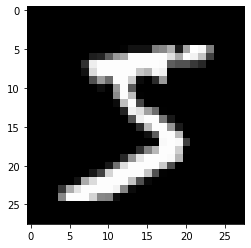

In [264]:
plt.imshow(xl)

In [253]:
len(x_train[0])

784

In [237]:
next(xl)

0

In [200]:
islice??

1
3
5


In [279]:
ls = list(x_train[0])

In [280]:
ls[:5], len(ls)

([tensor(0.), tensor(0.), tensor(0.), tensor(0.), tensor(0.)], 784)

In [281]:
lstr = iter(ls)

In [282]:
img1 = [list(islice(lstr, 28)) for _ in range(28)]

In [284]:
len(img1), len(img1[0])

(28, 28)

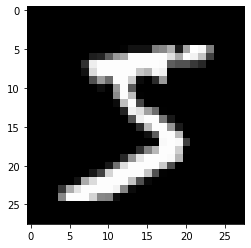

In [285]:
plt.imshow(img1)

In [286]:
iter??

In [287]:
x = [1, 2, 3, 4, 5, 6]

In [300]:
lx = iter(x)

In [299]:
iter(lambda)

KeyboardInterrupt: 

In [310]:
x = [1, 2, 3, 4, 5, 6]
xl = iter(list(x_train[0]))

In [311]:
img1 = list(iter(lambda: list(islice(xl, 28)), []))

In [312]:
len(img1), len(img1[0])

(28, 28)

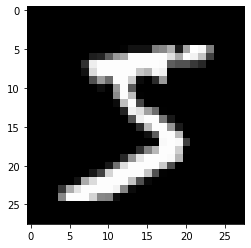

In [313]:
plt.imshow(img1)

#### matrix and tensor

In [331]:
class Matrix():
    def __init__(self, xs):
        self.xs = xs
    def __getitem__(self, idx):
        return self.xs[idx[0]][idx[1]]

In [332]:
m = Matrix(img)

In [334]:
m[14, 17]

tensor(0.9883)

#### tensor

In [335]:
imgs = x_train.reshape(-1, 28, 28)

In [336]:
imgs.shape

torch.Size([50000, 28, 28])

In [338]:
x_train.shape

torch.Size([50000, 784])

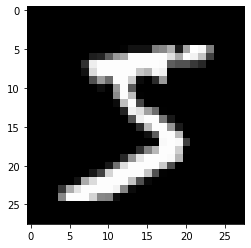

In [339]:
plt.imshow(imgs[0])

In [343]:
imgs[0,0,0]

tensor(0.)

#### matrix multiplication

In [344]:
torch.manual_seed(1)
weights = torch.randn(784, 10)
bias = torch.randn(10)

In [345]:
m1 = x_val[:5]
m1.shape

torch.Size([5, 784])

In [346]:
m2 = weights
m2.shape

torch.Size([784, 10])

In [347]:
ar, ac = m1.shape
br, bc = m2.shape

In [348]:
t = torch.zeros(ar, bc)
t.shape

torch.Size([5, 10])

In [349]:
for i in range(ar):
    for j in range(bc):
        for k in range(ac):
            t[i, j] += m1[i, k] * m2[k, j]

In [351]:
t.shape

torch.Size([5, 10])

In [360]:
torch.set_printoptions(precision=2, sci_mode=False, linewidth=140)

In [361]:
t

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [363]:
def matmul(m1, m2):
    ar, ac = m1.shape
    br, bc = m2.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i, j] += m1[i, k] * m2[k, j]
    return c

In [364]:
%time _ = matmul(x_val[:5], weights)

CPU times: user 688 ms, sys: 8.46 ms, total: 696 ms
Wall time: 701 ms


In [366]:
ar*bc*ac

39200

#### elementwise operations

In [370]:
a = torch.tensor([10., 6, -4])
b = torch.tensor([2, 8, 7])

In [371]:
a + b

tensor([12., 14.,  3.])

In [376]:
(a < b).float().mean()

tensor(0.67)

In [379]:
a * b

tensor([ 20.,  48., -28.])

In [377]:
m = torch.tensor([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

In [378]:
m.shape

torch.Size([3, 3])

In [380]:
m * m

tensor([[ 1,  4,  9],
        [16, 25, 36],
        [49, 64, 81]])

In [382]:
(m*m).sum().sqrt()

tensor(16.88)

In [387]:
m[2,:], m[:,2]

(tensor([7, 8, 9]), tensor([3, 6, 9]))

In [388]:
m[2]

tensor([7, 8, 9])

In [390]:
def matmul(m1, m2):
    (ar, ac), (br, bc) = m1.shape, m2.shape
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i, j] = (m1[i,:] * m2[:,j]).sum()
    return c

In [391]:
t2 = matmul(m1, m2)

In [393]:
t2

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [395]:
torch.allclose(t, t2)

True

In [396]:
%time _= matmul(m1, m2)

CPU times: user 5.05 ms, sys: 4.14 ms, total: 9.18 ms
Wall time: 7 ms


In [397]:
%timeit -n 50 _= matmul(m1, m2)

933 µs ± 140 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


#### broadcasting

#### broadcasting with a scalar

In [398]:
a

tensor([10.,  6., -4.])

In [399]:
a.shape

torch.Size([3])

In [400]:
a > 0

tensor([ True,  True, False])

In [401]:
2*m

tensor([[ 2,  4,  6],
        [ 8, 10, 12],
        [14, 16, 18]])

#### broadcasting a vector to a matrix

In [403]:
 c = torch.tensor([10, 20, 30]);c.shape

torch.Size([3])

In [404]:
m

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [405]:
m.shape

torch.Size([3, 3])

In [406]:
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [407]:
m + c

tensor([[11, 22, 33],
        [14, 25, 36],
        [17, 28, 39]])

In [408]:
c + m

tensor([[11, 22, 33],
        [14, 25, 36],
        [17, 28, 39]])

In [415]:
l = c.expand_as(m)
l

tensor([[10, 20, 30],
        [10, 20, 30],
        [10, 20, 30]])

In [416]:
m + l

tensor([[11, 22, 33],
        [14, 25, 36],
        [17, 28, 39]])

In [420]:
l.storage()

/var/folders/8k/07c2mpg56x7c31_26k0qj2y00000gn/T/ipykernel_44474/2651326052.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  l.storage()


 10
 20
 30
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 3]

In [421]:
c.storage()

/var/folders/8k/07c2mpg56x7c31_26k0qj2y00000gn/T/ipykernel_44474/1226304414.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  c.storage()


 10
 20
 30
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 3]

In [422]:
m.storage()

/var/folders/8k/07c2mpg56x7c31_26k0qj2y00000gn/T/ipykernel_44474/1122607061.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  m.storage()


 1
 2
 3
 4
 5
 6
 7
 8
 9
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 9]

In [425]:
l.stride(), l.shape

((0, 1), torch.Size([3, 3]))

In [426]:
m.stride(), m.shape

((3, 1), torch.Size([3, 3]))

In [433]:
k = torch.zeros(5, 6, 3)
k.stride()

(18, 3, 1)

In [448]:
c.unsqueeze(0)

tensor([[10, 20, 30]])

In [441]:
c[None]

tensor([[10, 20, 30]])

In [442]:
c.shape,c[None].shape

(torch.Size([3]), torch.Size([1, 3]))

In [447]:
c[None]

tensor([[10, 20, 30]])

In [446]:
c.shape, c[...,None].shape

(torch.Size([3]), torch.Size([3, 1]))

In [451]:
c[:,None], c[:,None].shape

(tensor([[10],
         [20],
         [30]]),
 torch.Size([3, 1]))

In [452]:
m

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [456]:
m[:,None].shape, m.shape

(torch.Size([3, 1, 3]), torch.Size([3, 3]))

In [460]:
c[:,None].expand_as(m)

tensor([[10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]])

#### broadcasting rules

In [463]:
c[:,None].shape

torch.Size([3, 1])

In [464]:
c[None,:].shape

torch.Size([1, 3])

In [465]:
c[None,:]

tensor([[10, 20, 30]])

In [466]:
c[:,None]

tensor([[10],
        [20],
        [30]])

In [468]:
c[:,None].shape, c[:,None].shape

(torch.Size([3, 1]), torch.Size([3, 1]))

In [467]:
c[None,:] * c[:,None]

tensor([[100, 200, 300],
        [200, 400, 600],
        [300, 600, 900]])